In [211]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import minimize

import matplotlib.pyplot as plt

%matplotlib inline

## Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [213]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [188]:
BOUNDS = [(-10, 10), (-10, 10)]

In [189]:
result = differential_evolution(
        ackley, 
        bounds=BOUNDS, 
        seed=42,
        popsize=1,
        mutation=1
)
result

     fun: 3.574451877257783
     jac: array([ 1.42108546e-06, -2.84217093e-06])
 message: 'Optimization terminated successfully.'
    nfev: 82
     nit: 10
 success: True
       x: array([-0.96847764,  0.9684776 ])

### Количество итераций в зависимости от стратегии

In [190]:
strategy_array = [
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand1bin'
]

In [191]:
count_iteration_depend_by_strategy = {}

for strategy in strategy_array:
    result = differential_evolution(
        ackley, 
        bounds=BOUNDS, seed=42, 
        strategy=strategy, 
        popsize=1, 
        mutation=1)
    count_iteration_depend_by_strategy[strategy] = result.nit

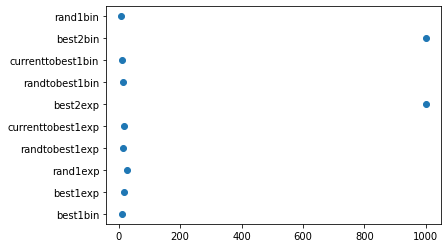

In [192]:
plt.scatter(count_iteration_depend_by_strategy.values(), count_iteration_depend_by_strategy.keys());

In [193]:
best_strategy = min(count_iteration_depend_by_strategy) ## самый оптимальный параметр

### Количество итераций в зависимости от размера популяции

In [194]:
popsize_range = np.arange(1, 10, 1)
count_iteration_depend_by_popsize = [] 

In [195]:
for item in popsize_range:
    result = differential_evolution(
        ackley, 
        bounds=BOUNDS,
        seed=42,
        strategy=best_strategy,
        popsize=item,
        mutation=1
    )
    count_iteration_depend_by_popsize.append(result.nit)

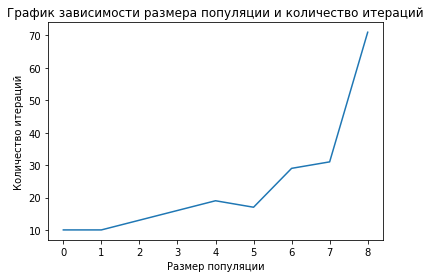

In [196]:
plt.plot(count_iteration_depend_by_popsize)
plt.title('График зависимости размера популяции и количество итераций')
plt.xlabel('Размер популяции')
plt.ylabel('Количество итераций')
plt.show()

In [197]:
best_popsize = 1 # Оптимальный размер популяции

### Количество итераций в зависимости от мутации

In [198]:
mutation_range = np.arange(0, 2, 0.1)

In [199]:
count_iteration_depend_by_mutation = []
for item in mutation_range:
    result = differential_evolution(
        ackley, 
        bounds=BOUNDS,
        seed=42,
        strategy=best_strategy,
        popsize=best_popsize,
        mutation=item
    )
    count_iteration_depend_by_mutation.append(result.nit)

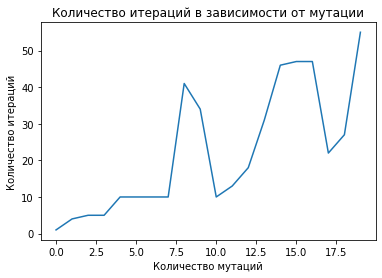

In [202]:
plt.plot(count_iteration_depend_by_mutation)
plt.title('Количество итераций в зависимости от мутации')
plt.xlabel('Количество мутаций')
plt.ylabel('Количество итераций')
plt.show()

In [203]:
best_mutation = 0

### Оптимизация с лучшими параметрами

In [208]:
result = differential_evolution(
        ackley, 
        bounds=BOUNDS,
        seed=42,
        strategy=best_strategy,
        popsize=best_popsize,
        mutation=best_mutation
)
result

     fun: 7.038850555686631
 message: 'Optimization terminated successfully.'
    nfev: 265
     nit: 1
 success: True
       x: array([-1.37592544, -1.37602192])

## Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [226]:
x0 = [0,0]

result_m = minimize(
    fun=ackley, 
    x0=x0,  
    method='Nelder-Mead',
    tol=1e-1,
    bounds=[(-10, 10), (-10, 10)]
)
result_m

 final_simplex: (array([[0.     , 0.     ],
       [0.00025, 0.     ],
       [0.     , 0.00025]]), array([4.44089210e-16, 7.08771053e-04, 7.08771053e-04]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 3
           nit: 1
        status: 0
       success: True
             x: array([0., 0.])